In [ ]:
!pip3 install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
  Using cached aggdraw-1.3.16-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (992 kB)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Multiply
from keras.layers import ELU, PReLU, LeakyReLU
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras import metrics
from sklearn.metrics import r2_score


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math as m
import numpy as np

In [ ]:


!wget -O humoments.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humoments.csv
!wget -O classicgeometry.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometry.csv
!wget -O colors.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colors.csv
!wget -O alldata.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/alldata.csv



--2023-04-21 05:48:58--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humoments.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108985 (106K) [text/plain]
Saving to: ‘humoments.csv’

humoments.csv       100%[===================>] 106.43K  --.-KB/s    in 0.003s  

2023-04-21 05:48:58 (29.7 MB/s) - ‘humoments.csv’ saved [108985/108985]

--2023-04-21 05:48:58--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometry.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19904 (19K) [text/p

In [ ]:
%reload_ext tensorboard

%rm -rf "logs/fit"

In [ ]:
class DeepLearning:



  def __init__(self ,file_name = "data.csv"):

    self.df = pd.read_csv(file_name)
    model_name = None
    self.input_shape = None
    self.num_classes = None
    self.epochs = None
    self.model = None
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test = None
    self.run_name = "run"
    self.history = None

  def plot(self):
    pd.DataFrame(self.history.history).plot(figsize=(8,5))
    plt.show()

  def plotAcc(self):
    plt.plot(self.history.history['accuracy'])
    plt.plot(self.history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

  def train(self, epochs = 2):

    self.epochs = epochs
    opt = optimizers.Adam(learning_rate=0.01)

    sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

    self.model.compile( loss = "categorical_crossentropy", 
                  optimizer = sgd, 
                  metrics=[r2_score]
                )

    #self.model.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy'])
  
    log_dir = "logs/fit/"
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    self.history = self.model.fit(self.X_train, self.y_train, batch_size=32, epochs = self.epochs, validation_split=0.2, shuffle = True,callbacks=[tensorboard_callback])

    # Evaluate the model on the test set
    test_loss = self.model.evaluate(self.X_test, self.y_test)
    print("Test loss:", test_loss)

    print(self.df.head(10))

  def buildData(self):

    X = self.df.drop(columns=['AverageMass', 'ID'])
    y = self.df['AverageMass']

    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)

    # Define the input shape and number of classes
    self.input_shape = (self.X_train.shape[1],)
    num_classes = 1

  def buildModel(self, model_name, run_name = "run"):

    self.model_name = model_name

    if(model_name == "FCNN"): 
      # FCNN
      self.model = keras.Sequential(
          [
          tf.keras.layers.Dense(64, activation='relu', input_shape = self.input_shape),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='linear'),
          tf.keras.layers.Dense(1)
          ]
      )
    elif(model_name == "Autoencoder"):
      # Autoencoder
      input_layer = Input(shape= self.input_shape)
      encoded = Dense(2, activation='relu')(input_layer)
      encoded = Dense(3, activation='relu')(encoded)
      decoded = Dense(2, activation='relu')(encoded)
      decoded = Dense(5, activation='linear')(decoded)

      # Define the autoencoder model
      autoencoder = Model(input_layer, decoded)

      # Define the encoder model
      encoder = Model(input_layer, encoded)



    elif(model_name == "MLP"):
      # MLP

      self.model = keras.Sequential(
          [
          tf.keras.layers.Dense(64, input_shape=(self.X_train.shape[1],), activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='linear'),
          ]
      )

    plot_model(self.model, to_file=self.run_name + '.png', show_shapes=True, show_layer_names=False)
    img = mpimg.imread(self.run_name + '.png')
    #imgplot = plt.imshow(img)
    #imgplot = plt.imshow(img2)
    #plt.show()

p1 = DeepLearning("classicgeometry.csv")
p1.buildData()
p1.buildModel("MLP")
p1.train(1)
p1.plot()

/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


NotImplementedError: ignored

# FCNN (Fully Connected Neural Network)

In [ ]:
df = pd.read_csv("data.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

# FCNN
model = keras.Sequential(
    [
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
    ]
)

model.compile(loss="mean_squared_error", optimizer="adam")

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)


NameError: ignored

In [ ]:
# Autoencoder

In [ ]:
df = pd.read_csv("humoments.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

# Autoencoder
input_layer = Input(shape=input_shape)
encoded = Dense(2, activation='relu')(input_layer)
encoded = Dense(3, activation='relu')(encoded)
decoded = Dense(2, activation='relu')(encoded)
decoded = Dense(5, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)

# Define the encoder model
encoder = Model(input_layer, encoded)

# Compile the model
encoder.compile(loss="mean_squared_error", optimizer="adam")

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
encoder.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)


16/16 [==============================] - 1s 11ms/step - loss: 85.2560 - val_loss: 93.3539


InvalidArgumentError: ignored

# MLP (Multilayer Perceptron)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 135.4430 - mae: 9.7760 - val_loss: 19.6906 - val_mae: 4.2164
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 14.2029 - mae: 3.2794 - val_loss: 2.1565 - val_mae: 1.1943
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 4.7719 - mae: 1.7604 - val_loss: 3.1651 - val_mae: 1.4392
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 2.9620 - mae: 1.3832 - val_loss: 2.4879 - val_mae: 1.2850
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 2.0621 - mae: 1.1678 - val_loss: 1.8046 - val_mae: 1.0858
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 1.7487 - mae: 1.0682 - val_loss: 1.5284 - val_mae: 0.9974
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 1.5833 - mae: 1.0144 - val_loss: 1.5334 - val_mae: 1.0012
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 1.511

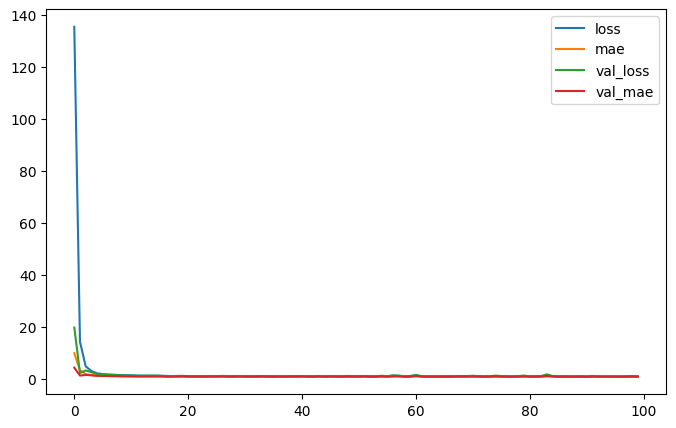

Test loss: [0.7925786375999451, 0.712090253829956]
5/5 [==============================] - 0s 3ms/step
R^2 score: -0.3404131993882029


In [ ]:
df = pd.read_csv("colors.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

inputs = Input(shape=input_shape)


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))



#self.model.compile( loss = "categorical_crossentropy", optimizer = sgd, metrics=['accuracy'])
# Compile the model

opt = optimizers.Adam(learning_rate=0.01)

#model.compile(loss="mean_squared_error", optimizer=opt, metrics = [metrics.mae, metrics.categorical_accuracy])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
HISTORY = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

pd.DataFrame(HISTORY.history).plot(figsize=(8,5))
plt.show()
print("Test loss:", test_loss)
# calculate the mean absolute error (MAE)
#mae = np.mean(np.abs(y_test - model.predict(X_test)))

# calculate the mean squared error (MSE)
#mse = np.mean((y_test - model.predict(X_test))**2)
y_pred = model.predict(X_test)
#print(y_test)
#print(y_pred)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

# print the MAE and MSE
#print("Mean Absolute Error (MAE): {:.2f}".format(mae))
#print("Mean Squared Error (MSE): {:.2f}".format(mse))


In [ ]:
print(X_test)
print(type(X_test))
y_pred = model.predict(X_test)




print(y_pred[:10])


     AreaInSquaredPixels  Roundness
308              22598.0     0.9058
287              25697.5     0.8700
684              18380.0     0.9466
403              22168.0     0.9034
327              19113.0     0.9624
..                   ...        ...
678              21386.5     0.9594
292              19296.5     0.9706
445              19195.5     0.9806
258              20749.0     0.9439
497              20009.0     0.9492

[155 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
5/5 [==============================] - 0s 2ms/step
[[25.665035]
 [29.15298 ]
 [20.918118]
 [25.180538]
 [21.744656]
 [28.676846]
 [21.664486]
 [30.834896]
 [26.62817 ]
 [23.526974]]
